<a href="https://colab.research.google.com/github/subtext2healthcare/Tips-Tricks-Useful-Code-Snippets/blob/master/Ex1_Basic_image_manip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Image Manipulations in Python and OpenCV: Resizing (scaling), Rotating, and Cropping


The ipython notebook and the data are in my own Google Drive, in a folder named Colab_Notebooks

The data and code used for this particular notebook is inside a subfolder named OpenCV

Since I am modifying the code as per my understanding, I will be running the code from inside the subfolder OpenCV

I will also be uploading these Notebooks to my github account to my private repository named "Tips-Tricks-Useful-Code-Snippets"

## Blog Post Code

### Import Packages

In [1]:
# Mount your Google drive - This is needed, since the Notebook and Data are stored in gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Use the below code line if you want to use current directory.
%cd 'gdrive/My Drive/Colab_Notebooks/OpenCV'

/content/gdrive/My Drive/Colab_Notebooks/OpenCV


In [3]:
# View Current working directory
!pwd

/content/gdrive/My Drive/Colab_Notebooks/OpenCV


In [6]:
# View what files are present in the folder
!ls



examples.py  jurassic-park-tour-jeep.jpg  thumbnail.png


In [5]:
!unzip -qq 'basic-image-manip.zip'
%cd basic-image-manip

replace basic-image-manip/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/basic-image-manip/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace basic-image-manip/examples.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace basic-image-manip/jurassic-park-tour-jeep.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/basic-image-manip/._jurassic-park-tour-jeep.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace basic-image-manip/thumbnail.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
/content/gdrive/My Drive/Colab_Notebooks/OpenCV/basic-image-manip


In [9]:
# import the necessary packages
from matplotlib import pyplot as plt
# Magic function to display plots inline in the Notebook itself
%matplotlib inline 
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [10]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Basic Image Manipulations

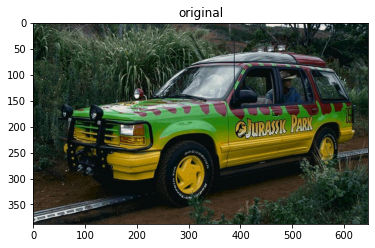

In [11]:
# load the image and show it
image = cv2.imread("jurassic-park-tour-jeep.jpg")
plt_imshow("original", image)

In [12]:
# print the dimensions of the image
print(image.shape)

(388, 647, 3)


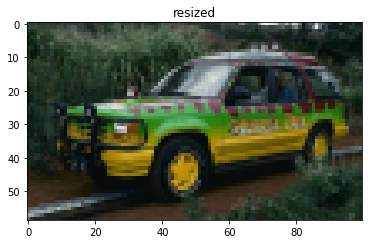

In [13]:
# we need to keep in mind aspect ratio so the image does
# not look skewed or distorted -- therefore, we calculate
# the ratio of the new image to the old image
r = 100.0 / image.shape[1]
dim = (100, int(image.shape[0] * r))

# perform the actual resizing of the image and show it
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt_imshow("resized", resized)

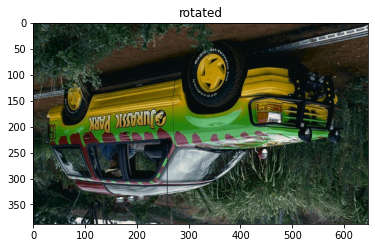

In [14]:
# grab the dimensions of the image and calculate the center of the image
(h, w) = image.shape[:2]
center = (w / 2, h / 2)

# rotate the image by 180 degrees
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("rotated", rotated)

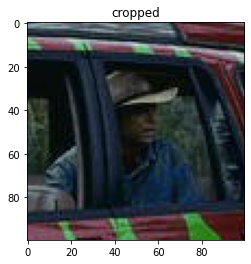

In [15]:
# crop the image using array slices -- it's a NumPy array
# after all!
cropped = image[70:170, 440:540]
plt_imshow("cropped", cropped)

In [16]:
# write the cropped image to disk in PNG format
cv2.imwrite("thumbnail.png", cropped)

True

For a detailed walkthrough of the concepts and code, be sure to refer to the Pyimagesearch's full tutorial, [*Basic Image Manipulations in Python and OpenCV: Resizing (scaling), Rotating, and Cropping*](https://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/) published on 2014-01-20.